In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/Users/sejinmoon/Desktop/24-1/데이터 과학 개론/drug200.csv')
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [3]:
#라벨 인코딩
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['BP'] = label_encoder.fit_transform(df['BP'])
df['Cholesterol'] = label_encoder.fit_transform(df['Cholesterol'])
df['Drug'] = label_encoder.fit_transform(df['Drug'])
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,0
1,47,1,1,0,13.093,3
2,47,1,1,0,10.114,3
3,28,0,2,0,7.798,4
4,61,0,1,0,18.043,0
...,...,...,...,...,...,...
195,56,0,1,0,11.567,3
196,16,1,1,0,12.006,3
197,52,1,2,0,9.894,4
198,23,1,2,1,14.020,4


In [4]:
from sklearn.preprocessing import StandardScaler

# 스케일링
scaler = StandardScaler()
features_scaled = scaler.fit_transform(df)

In [5]:
# 결과 시각화 (2D 시각화를 위해 PCA 사용)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_features = pca.fit_transform(df)

# K-Means Clustering

In [6]:
#K-Means
from sklearn.cluster import KMeans

model = KMeans(n_clusters=5, random_state=123)
model.fit(df)

KMeans(n_clusters=5, random_state=123)

In [7]:
# label 컬럼 생성
df['label'] = model.predict(df)

df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,label
0,23,0,0,0,25.355,0,2
1,47,1,1,0,13.093,3,1
2,47,1,1,0,10.114,3,1
3,28,0,2,0,7.798,4,4
4,61,0,1,0,18.043,0,0
...,...,...,...,...,...,...,...
195,56,0,1,0,11.567,3,0
196,16,1,1,0,12.006,3,4
197,52,1,2,0,9.894,4,1
198,23,1,2,1,14.020,4,4


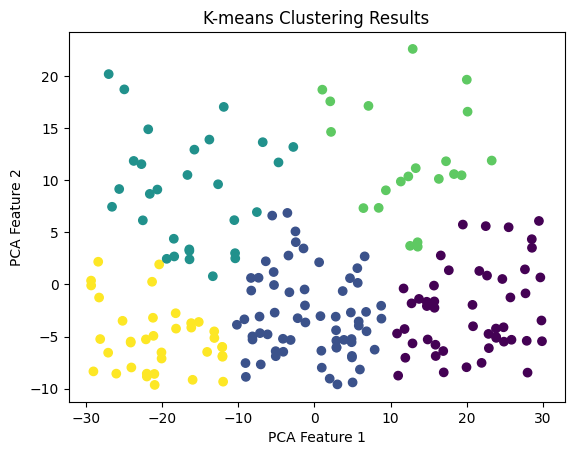

In [8]:
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=df['label'], cmap='viridis')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.title('K-means Clustering Results')
plt.show()

# DBSCAN Clustering

In [9]:
from sklearn.cluster import DBSCAN
#DBSCAN
dbscan = DBSCAN(eps=0.6, min_samples=5)
dbscan.fit(df)

DBSCAN(eps=0.6)

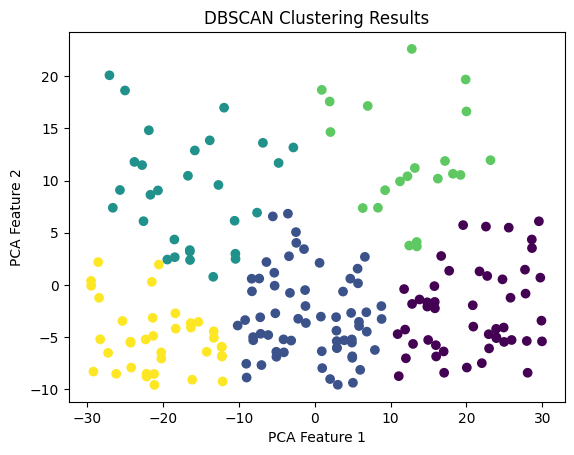

In [10]:
# 결과 시각화
pca_features = pca.fit_transform(df)
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=df['label'], cmap='viridis')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.title('DBSCAN Clustering Results')
plt.show()

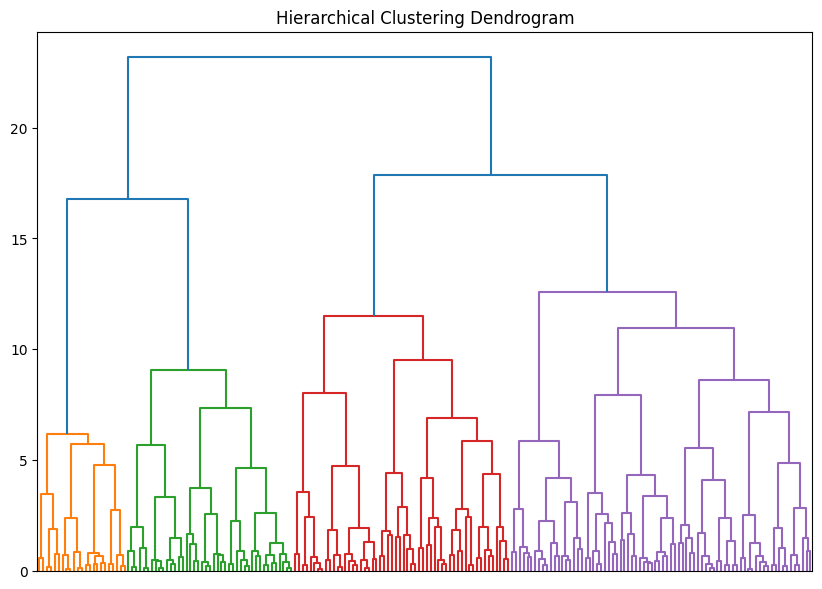

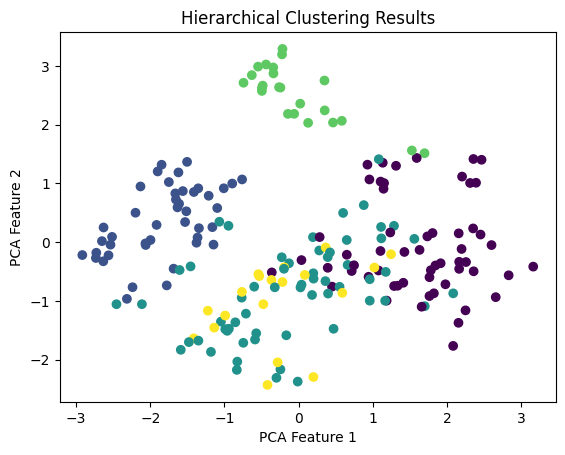

In [11]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# 스케일링
scaler = StandardScaler()
features_scaled = scaler.fit_transform(df)

# 계층적 클러스터링 모델 생성 및 학습
hierarchical = AgglomerativeClustering(n_clusters=5)
df['label'] = hierarchical.fit_predict(features_scaled)

# 덴드로그램 생성
linked = linkage(features_scaled, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', no_labels=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

# 결과 시각화
pca = PCA(n_components=2)
pca_features = pca.fit_transform(features_scaled)
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=df['label'], cmap='viridis')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.title('Hierarchical Clustering Results')
plt.show()